## Tweets were collected for 12 Hrs on 18/07/17

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

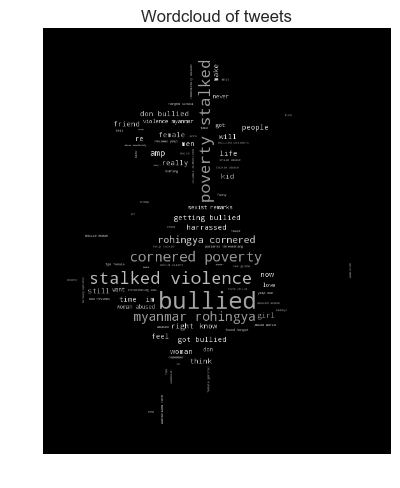

In [191]:
import cv2
img=cv2.imread('output.png')
plt.imshow(img)
plt.axis('off')
plt.title('Wordcloud of tweets')
plt.show()

In [2]:
ds=pd.read_csv('twitter_data.csv',error_bad_lines=False)
data=np.array(ds)

In [3]:
ds.head()

,tweet,user_name,country,user_location,language
0,more arrests in detroit more health profession...,ClareD x,NONE,United Kingdom,en
1,for days our tribe was stalked and eyed by som...,CBD HEMP OIL,NONE,NONE,en
2,myanmar s rohingya cornered by poverty stalked...,Grahame Lucas,NONE,Citizen of nowhere,en
3,hetherington can i be honest can of worms i re...,Jen Leavesley,NONE,United Kingdom,en
4,sorry ladies after you have been stalked in re...,Super Empath,NONE,NONE,en


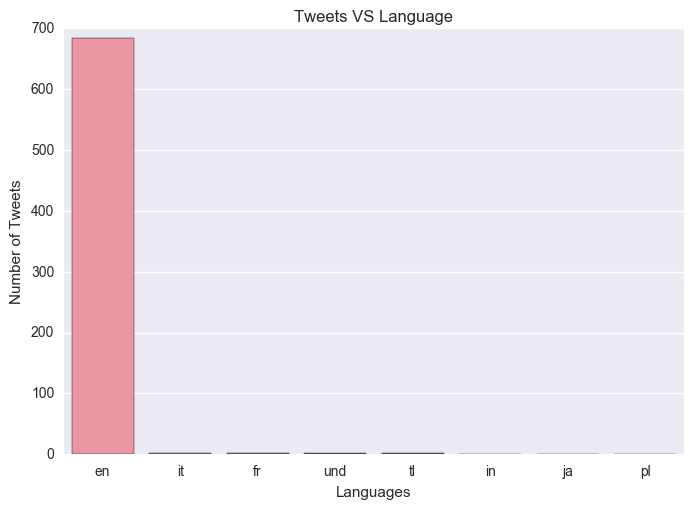

In [104]:
counts=ds['language'].value_counts()
sns.barplot(ds['language'].unique(),counts)
plt.ylabel('Number of Tweets')
plt.xlabel('Languages')
plt.title('Tweets VS Language')
plt.show()

In [160]:
a=np.array(ds['user_location'])
def freq(a):
    counter={}
    for i in a:
        try:
            counter[i]+=1
        except:
            counter[i]=1
    return counter.keys(),counter.values()

In [170]:
x,y=freq(a)
X=[]
for i in range(len(x)):
    X.append([x[i],y[i]])
X.sort(key=lambda x:x[1])
X=X[::-1]

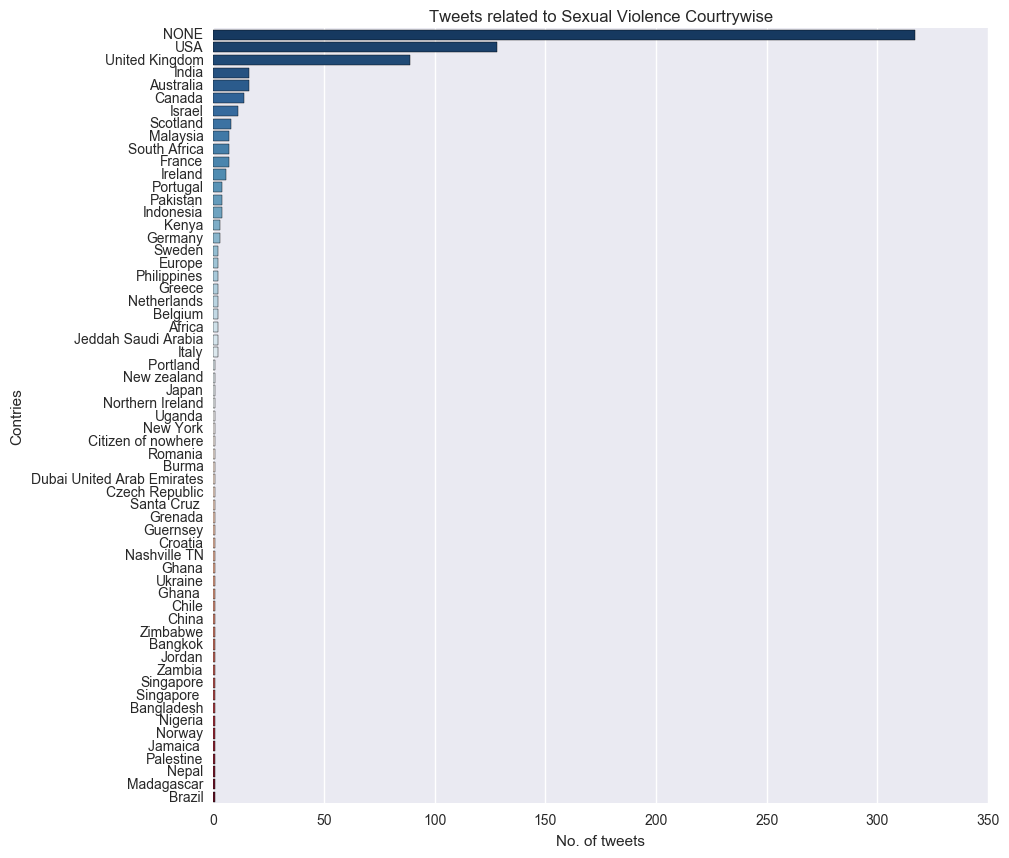

In [192]:
counter=ds['user_location'].value_counts()
sns.set(font_scale=1) 
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(counter,X[:,0],palette="RdBu_r")
plt.xlabel('No. of tweets')
plt.ylabel('Contries')
plt.title('Tweets related to Sexual Violence Courtrywise')
plt.show()

In [194]:
print counter

NONE                          317
USA                           128
United Kingdom                 89
Australia                      16
India                          16
Canada                         14
Israel                         11
Scotland                        8
Malaysia                        7
France                          7
South Africa                    7
Ireland                         6
Indonesia                       4
Portugal                        4
Pakistan                        4
Kenya                           3
Germany                         3
Philippines                     2
Jeddah Saudi Arabia             2
Europe                          2
Belgium                         2
Greece                          2
Netherlands                     2
Sweden                          2
Africa                          2
Italy                           2
Singapore                       1
Northern Ireland                1
Japan                           1
Nigeria       

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sid=SIA()

In [28]:
neg_count=0
pos_count=0
neu_count=0
senti=[]
for i in range(697):
    temp=sid.polarity_scores(ds['tweet'][i])
    if(temp['neg']>temp['pos'] and temp['neg']>temp['neu']):
        neg_count+=1
        senti.append('neg')
    if(temp['pos']>temp['neg'] and temp['pos']>temp['neu']):
        pos_count+=1
        senti.append('pos')
    if(temp['neu']>temp['neg'] and temp['neu']>temp['pos']):
        neu_count+=1
        senti.append('neu')

In [12]:
a=sid.polarity_scores(ds['tweet'][0])

In [23]:
ds.describe()

,tweet,user_name,country,user_location,language
count,697,697,697,697,697
unique,647,631,10,61,8
top,myanmar s rohingya cornered by poverty stalked...,,NONE,NONE,en
freq,21,24,675,317,684


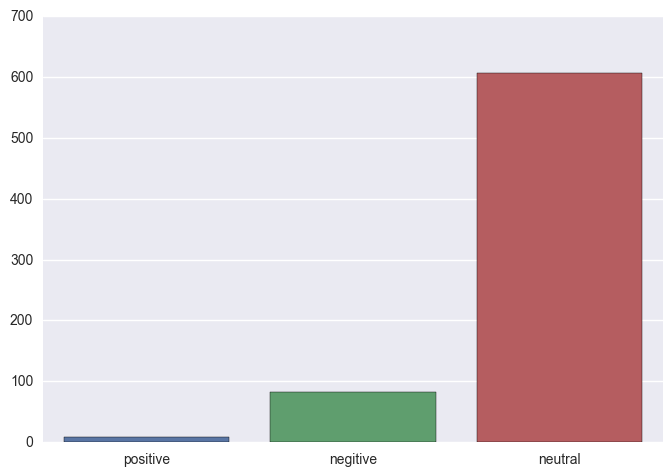

In [29]:
sentiment=[pos_count,neg_count,neu_count]
sns.barplot(['positive','negitive','neutral'],sentiment)
plt.show()

In [36]:
len(senti)

697

In [39]:
sentiment=pd.DataFrame(senti)

In [41]:
ds['sentiment']=sentiment

In [50]:
t=ds.loc[ds['user_location']=='USA']
t.head()

,tweet,user_name,country,user_location,language,sentiment
7,this still takes me out,jerusalem,NONE,USA,en,neu
11,today in 80s history on 7 18 1989 actress rebe...,The Vinyl Countdown,NONE,USA,en,neu
23,afp myanmar s rohingya cornered by poverty sta...,Supra1BqTeam,NONE,USA,en,neg
24,i think about this tweet a lot,Aristhotle,NONE,USA,en,neu
34,lmfaoooo this is photoshopped lmfaooooooooooo,IvyStrong,NONE,USA,en,neu


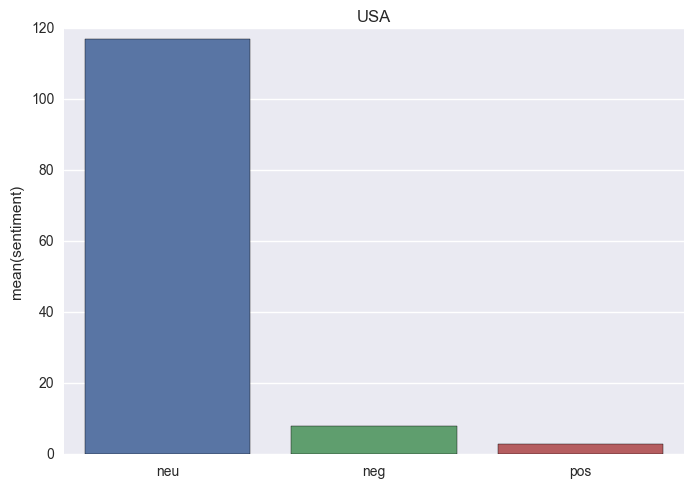

In [52]:
sns.barplot(['neu','neg','pos'],t['sentiment'].value_counts())
plt.title('USA')
plt.show()
